In [1]:
import warnings
warnings.filterwarnings('ignore')         # warning library imported, warnings will be ignored if any occurs

In [2]:
import numpy as np                      # relevant libraries imported 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import scipy
from scipy import stats        # stats method imported from scipy library as it is necessary to analyse statistics
import seaborn as sns          # seaborn library is imported for visualize analysed data
from sklearn.preprocessing import StandardScaler

In [3]:
sales=pd.read_csv('sales_data_with_discounts.csv')   # read the dataset 
sales

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
sales.info()                    # information about sales dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [5]:
sales1=sales[['Volume','Avg Price','Total Sales Value','Discount Rate (%)','Discount Amount','Net Sales Value']]  # necessary variables taken to be analysed 

In [6]:
sales1.rename(columns={'Avg Price':'Avg_Price',
                       'Total Sales Value':'Total_Sales_Value',
                       'Discount Rate (%)':'Discount_Rate',
                       'Discount Amount':'Discount_Amount',
                       'Net Sales Value':'Net_Sales_Value'}, inplace=True)  # renaming column names in the dataset

In [7]:
sales1

,Volume,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [8]:
sales1.sum()  # this code prints sum of all columns

Volume               2.280000e+03
Avg_Price            4.704045e+06
Total_Sales_Value    1.521578e+07
Discount_Rate        6.819859e+03
Discount_Amount      1.505925e+06
Net_Sales_Value      1.370985e+07
dtype: float64

In [9]:
sales1['Volume'].sum()     # this code prints sum of column 'Volume' 

np.int64(2280)

In [10]:
sales1.median()      # this code prints median value of all columns in dataset

Volume                  4.000000
Avg_Price            1450.000000
Total_Sales_Value    5700.000000
Discount_Rate          16.577766
Discount_Amount       988.933733
Net_Sales_Value      4677.788059
dtype: float64

In [11]:
sales1.mean()       # this code prints mean value of all columns in dataset

Volume                   5.066667
Avg_Price            10453.433333
Total_Sales_Value    33812.835556
Discount_Rate           15.155242
Discount_Amount       3346.499424
Net_Sales_Value      30466.336131
dtype: float64

In [12]:
sales1.max()        # this code prints maximum value of each columns in dataset

Volume                   31.000000
Avg_Price             60100.000000
Total_Sales_Value    196400.000000
Discount_Rate            19.992407
Discount_Amount       25738.022194
Net_Sales_Value      179507.479049
dtype: float64

In [13]:
sales1.min()        # this code prints minimum value of each columns in dataset

Volume                 1.000000
Avg_Price            290.000000
Total_Sales_Value    400.000000
Discount_Rate          5.007822
Discount_Amount       69.177942
Net_Sales_Value      326.974801
dtype: float64

In [14]:
volume = sales1.Volume
volume.value_counts()          # this code prints counts the values from column 'Volume'

Volume
3     110
2      76
4      61
6      38
5      38
7      32
1      27
12     10
11      9
9       9
8       8
10      7
15      6
14      5
13      4
29      2
24      2
22      2
25      1
31      1
16      1
17      1
Name: count, dtype: int64

In [15]:
sales1.describe()           # this code prints summary of dataset

,Volume,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


# Barplot by standardised data

In [16]:
day_sales = sales.groupby('Day')['Total Sales Value'].sum().reset_index()  # grouping two variables to be analysed. grouping helps anaylse two variables more deeply

In [17]:
scaler = StandardScaler()  # Standardscaler is being used to standardise the variable

In [18]:
day_sales['Standardized Sales'] = scaler.fit_transform(day_sales[['Total Sales Value']]) # Total sales value column has been standardising by scaler

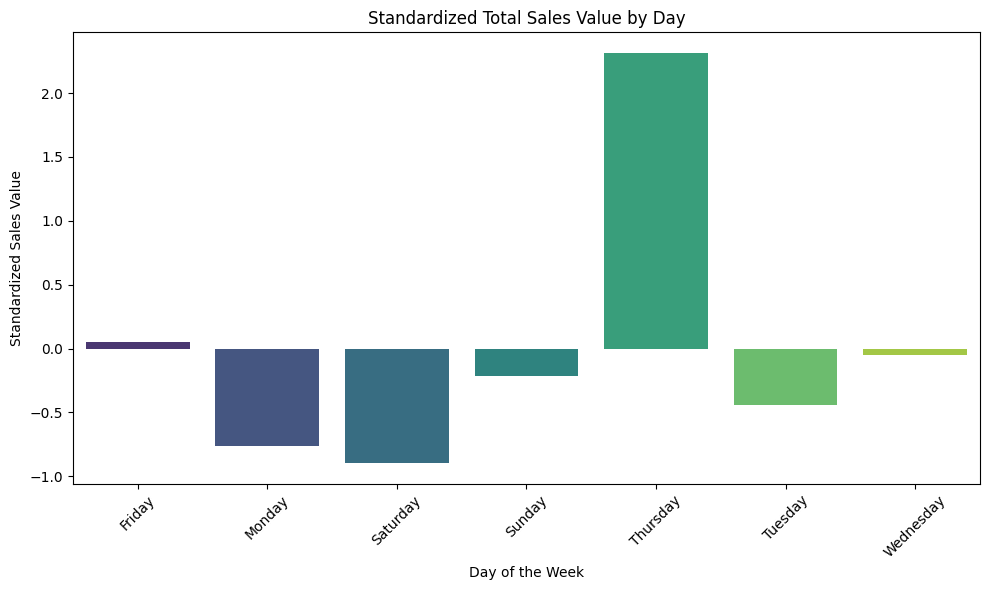

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=day_sales, x='Day', y='Standardized Sales', palette='viridis')  # X-axis assigned as 'Day', y-axis assigned as 'Standardized Sales'
plt.title('Standardized Total Sales Value by Day')           # Title of Barplot
plt.xlabel('Day of the Week')
plt.ylabel('Standardized Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# from the barplot Thursday has the highest standardized sales value (~ +2.3), meaning sales were significantly above average on that day
# Monday and Saturday have the lowest values (~ -0.6 to -0.9), meaning these days had lower sales than the average.
# Sunday, Tuesday, Wednesday, and Friday are close to or below zero, suggesting near-average or slightly below-average sales

# Insight from this barplot Thursday is the strongest sales day.

## pairplot analysis

In [21]:
sal =sales[['Volume','Avg Price','Total Sales Value','Discount Rate (%)','Discount Amount','Net Sales Value']]

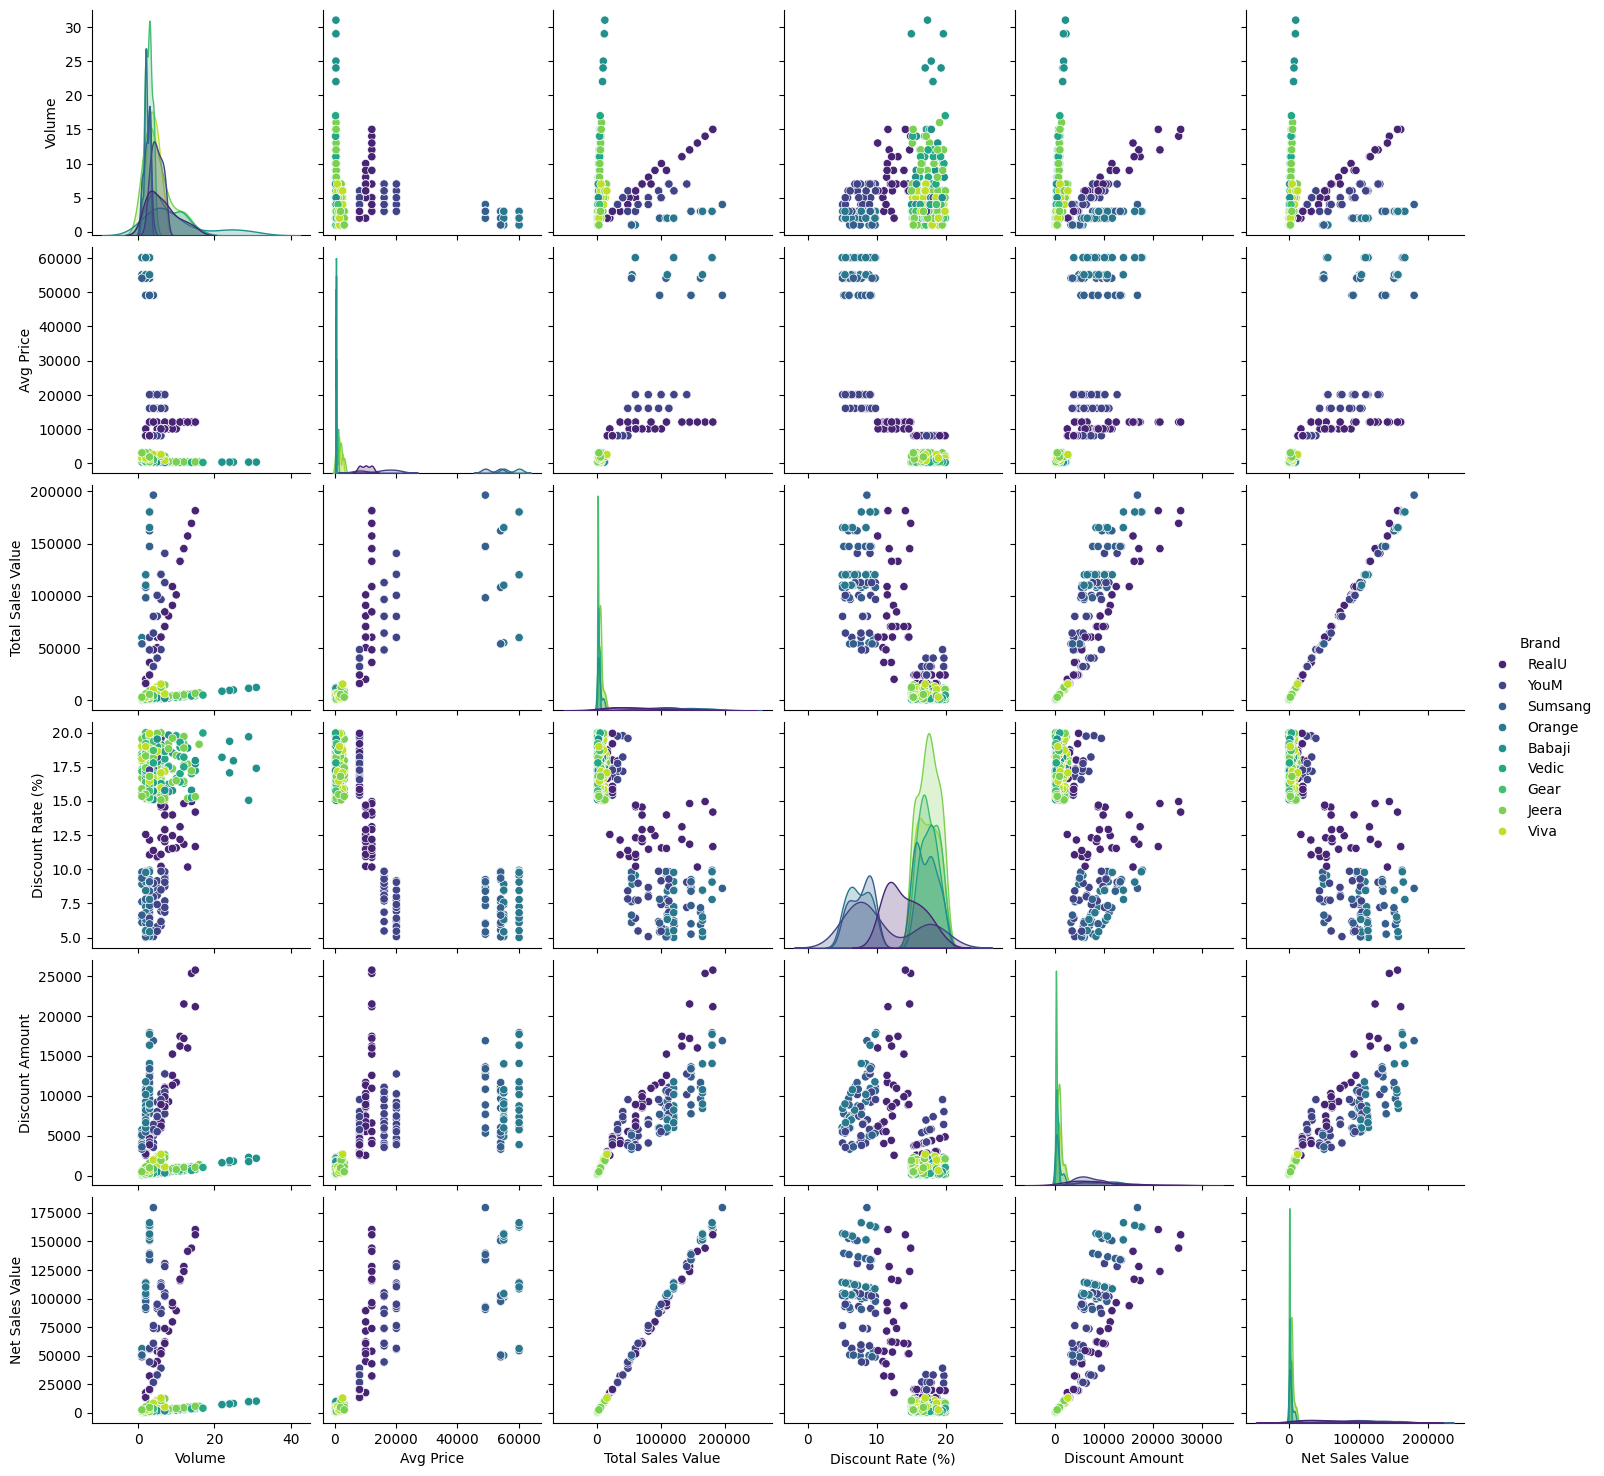

In [22]:
sns.pairplot(sales, vars = sal, hue='Brand', palette='viridis')
plt.show()

In [23]:
# Many brands sell small quantites at lower prices.
# brands like RealU, YouM, Sumsang achieve high revenue through price than volume.
# samsung, Orange seem to have higher prices and total sales, indicating premium products or markets.
# brands like Jeera, Gear, Viva Appear frequently with higher discounts and moderate volumes. possibly trying to boost sales via promotions

# Histogram plotted

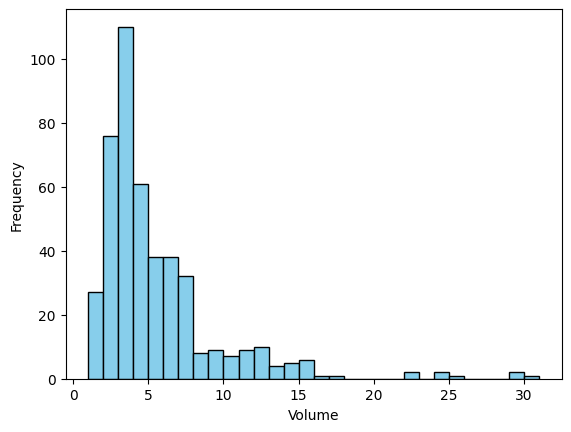

In [24]:
plt.hist(sales1['Volume'],                                   # taken volume column to be analyse, it's plotting how many transactions fall into different volume ranges.                      
         bins=30, color='skyblue',edgecolor='black')         # the range of volume divided into 30 bins    
plt.xlabel('Volume')                                   # x-axis as Volume
plt.ylabel('Frequency')                                # y-axis as Frequency      
plt.show()

In [25]:
# most of the volume being lies on 1 to 10, this analysis shows occasional spikes.
# this distribution is right-skewed.

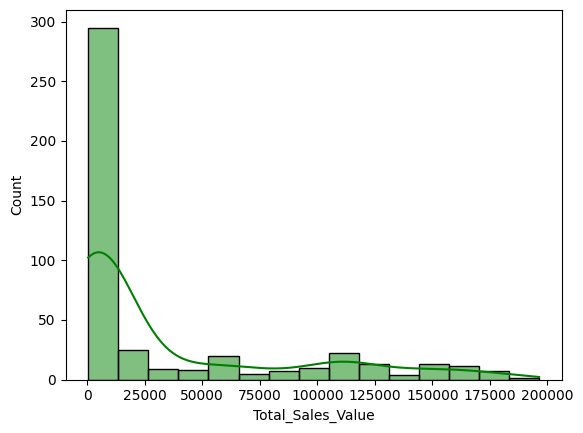

In [26]:
sns.histplot(sales1['Total_Sales_Value'],kde=True,color='green',edgecolor='black')
plt.show()

In [27]:
# Most of sales value lies on 20000/- , few transactions have very high sales values. 

## Box plot

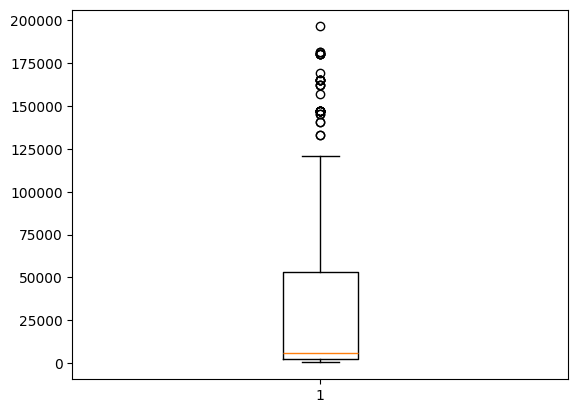

In [28]:
plt.figsize=(15,8)
plt.boxplot(sales1['Total_Sales_Value'])
plt.show()

In [29]:
# This boxplot analysis shows 50% of the sales value lies on 400 to 50000, this is right skewed.

<Axes: title={'center': 'Discount Rate (%)'}, xlabel='BU'>

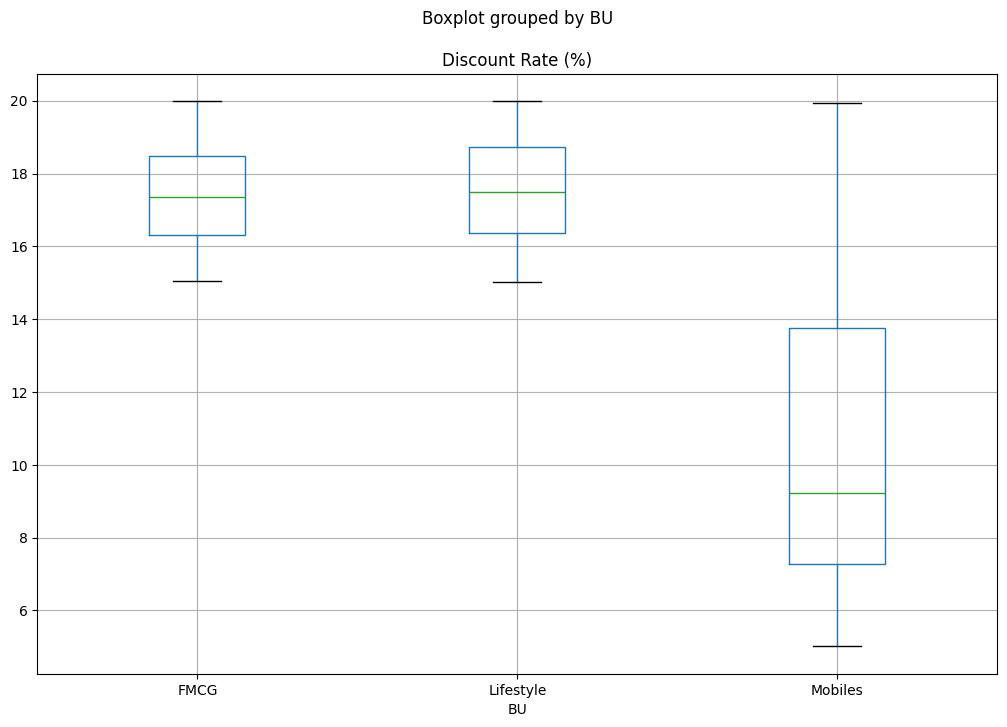

In [30]:
sales.boxplot('Discount Rate (%)',by='BU',figsize=(12,8))

In [31]:
# Here boxplot shows Fast-moving consumer goods has 50% of discount rates from 16.5% to 18.5%,
# Lifestyle products has 50% of discount rates are from 16.5% to 19%,
# Mobiles phone has 50% of discount rates between 7% to 13.8% 

## Bar plot 

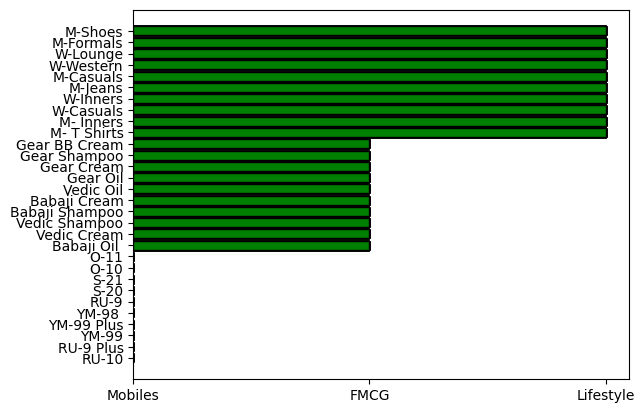

In [32]:
plt.barh(sales['Model'],sales['BU'],color='green',              # Two columns 'Model','BU' taken to bar plot, 
       edgecolor='black')
plt.show()

In [33]:
# Barplot shows different various product  according to category.

## Conversion of categorical data into dummy variables

In [34]:
data = sales.iloc[:,1:7]          # dataset 'data' have certain variables like 'day','SKU','City','Volume','BU','Brand'

In [35]:
data.head()                   # dataset before get dummy variables

,Day,SKU,City,Volume,BU,Brand
0,Thursday,M01,C,15,Mobiles,RealU
1,Thursday,M02,C,10,Mobiles,RealU
2,Thursday,M03,C,7,Mobiles,YouM
3,Thursday,M04,C,6,Mobiles,YouM
4,Thursday,M05,C,3,Mobiles,YouM


In [38]:
dum_var = pd.get_dummies(data, columns=['BU'])   # one-hot encoding which converts categorical column 'BU' as binary columns       
BU = [col for col in dum_var.columns if col.startswith('BU_')]  # list 'BU' created startswith 'BU_'
dum_var[BU] = dum_var[BU].astype(int)                            # converting column 'BU' as integer
print(dum_var.head())                              # prints dummy variables dataset

        Day  SKU City  Volume  Brand  BU_FMCG  BU_Lifestyle  BU_Mobiles
0  Thursday  M01    C      15  RealU        0             0           1
1  Thursday  M02    C      10  RealU        0             0           1
2  Thursday  M03    C       7   YouM        0             0           1
3  Thursday  M04    C       6   YouM        0             0           1
4  Thursday  M05    C       3   YouM        0             0           1
